Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

# Lab 4.3: Clustering

In this lab, we learn how to cluster documents. The code is partially adapted from [this notebook](https://www.kaggle.com/cherishzhang/clustering-on-papers). We compare different document representations 

## 1. Tf-idf

Calculating tf-idf (term frequency - inverse document frequency) is a simple approach to extract the key words of an article. The class TfidfVectorizer from the module sklearn calculates the tf-idf scores for all terms in our documents. 

In [ ]:
import pandas as pd
import stanza
import string
# This is very simplistic pre-processing. You might want to modify it
def preprocess(article):
    processed_article = nlp.process(article)
    all_lemmas = []
    for s in processed_article.sentences: 
        stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
        lemmas = [word.lemma.lower() for word in s.words if not word.text.lower in stopwords]
        clean_lemmas = [lemma for lemma in lemmas if not lemma in string.punctuation]
        all_lemmas.extend(clean_lemmas)
    return all_lemmas

# Read in TSV
tsv_file = "../data/veganism_overview_en.tsv"
news_content = pd.read_csv(tsv_file, sep="\t", keep_default_na=False, header=0)
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma')

# We filter out empty articles
news_content = news_content[news_content["Text"].str.len() >0 ]
articles = news_content["Text"]

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# You can play around with the ngram range
vectorizer = TfidfVectorizer(use_idf=True, tokenizer=preprocess)
tf_idf = vectorizer.fit_transform(articles)
all_terms = vectorizer.get_feature_names()


The terms are ordered alphabetically. **Do some spot checks and come up with ideas for better pre-processing of the articles.**.

In [8]:
# Randomly look at some terms
print(all_terms[0:50])

# Select a document
i = 5
print(tf_idf[i])

['!!!', '!.', '#carrotbacon', '#fashionisgreat', '#indiauk', '#tabithabrown', '#unbeatablecombination', '#vegan', '#womenempowerment', "''s", "'.", "'s", '--', '-gm', '-y', '...', '....', '.â\x80\x9d', '0', '0.5', '00', '1', '1,000,000,000,000', '1.5', '1.50', '1.6', '10', '10,000', '100', '10:15', '11', '110', '11:23', '11th', '12', '121', '12:02', '12:17', '12th', '13', '14', '148', '15', '15,000', '16', '160', '160c', '17', '18', '180']
  (0, 3787)	0.03555850678421887
  (0, 214)	0.02712240229091169
  (0, 3628)	0.029176840091503637
  (0, 4169)	0.03555850678421887
  (0, 2558)	0.024024570076208927
  (0, 3111)	0.024024570076208927
  (0, 2084)	0.03555850678421887
  (0, 3179)	0.02712240229091169
  (0, 339)	0.03555850678421887
  (0, 3345)	0.0875305202745109
  (0, 1347)	0.07111701356843773
  (0, 2974)	0.031825471076879254
  (0, 2989)	0.03555850678421887
  (0, 4115)	0.03555850678421887
  (0, 2896)	0.019863233940550527
  (0, 1401)	0.025443804384164027
  (0, 2461)	0.024024570076208927
  (0, 28

In [7]:
print(vectorizer.get_feature_names()[3823])
print(vectorizer.get_feature_names()[346])

the
and


## 2. Clustering

In clustering, we try to infer groups of similar documents. Here, we use the k-means algorithm of the *sklearn* module and the tf-idf vectors as document representation. The number of clusters is an experimental parameter. **Analyze the clusters you obtain. Do they correspond to useful conceptual groups? What happens if you vary the number of clusters?** 

In [9]:
# How many clusters do you expect? 
from sklearn.cluster import KMeans
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(tf_idf)


KMeans(n_clusters=4)

In [10]:
# Output the clusters
clusters = km.labels_.tolist()
clustered_articles ={'Title': news_content["Title"],'Author': news_content["Author"],'Publisher': news_content["Publisher"], 'Cluster': clusters}
overview = pd.DataFrame(clustered_articles, columns = ['Author', 'Title', 'Publisher', 'Cluster'])
overview

,Author,Title,Publisher,Cluster
0,Ela Dutt,Veganism: From fad to lifestyle,newsindiatimes.com,3
1,,Interest in Veganism Hits All-Time High in 202...,VegNews,0
2,https://www.facebook.com/bbcnews,Why black Americans are more likely to be vegan,BBC News,3
3,"Lauren Panoff, MPH, RD",Is Beeswax Vegan?,Healthline,3
4,sophie,Opinion: Miley Cyrus Says She's No Longer Vega...,Green Matters,2
6,By Amy Barrett,Global veganism could undo 16 years’ of fossil...,BBC Focus Magazine,3
7,,Perils of veganism,Deccan Herald,3
9,Marthe de Ferrer,Live lamb used in provocative new vegan commer...,Euronews,3
10,,Opinion - veganism is not yet fully accessible,Cherwell Online,3
11,Maria Chiorando,Top 10 Countries Where Veganism Is Most Popula...,Plant Based News,0


## 3. Represent a document by keywords

Instead of representing a document by all of its words, we could focus on the most relevant words. In this example, we extract the words with the highest tf-idf as keywords. **Do you think these are representative keywords? What could be improved?**

In [17]:
import numpy as np
# We extract the keywords
num_keywords = 10

def get_top_tfidf_features(row, terms, top_n=25):
    top_ids = np.argsort(row)[::-1][:top_n]
    top_features = [terms[i] for i in top_ids]
    return top_features, top_ids

keywords = []
keyword_ids = []
for i in range(0, tf_idf.shape[0]):
    row = np.squeeze(tf_idf[i].toarray())
    top_terms, top_ids= get_top_tfidf_features(row, all_terms, top_n=num_keywords)
    keywords.append(top_terms)
    keyword_ids.append(top_ids)
# Show a few keywords
for x in range(8):
    print("Keywords for article " + str(x))
    print(keywords[x])

Keywords for article 0
['be', 'the', 'a', 'to', 'vision', 'in', 'vegan', 'of', 'and', 'indian']
Keywords for article 1
['the', 'in', 'sale', 'report', 'data', 'and', 'of', 'top', 'pencil', 'google']
Keywords for article 2
['the', 'he', 'be', 'black', 'and', 'to', 'of', 'a', 'vegan', 'americans']
Keywords for article 3
['beeswax', 'bee', 'be', 'the', 'a', 'honey', 'hife', 'of', 'contain', 'substance']
Keywords for article 4
['she', 'to', 'vegan', 'be', 'fish', 'cyrus', 'the', 'a', 'animal', 'i']
Keywords for article 5
['the', 'co2', 'and', 'to', 'ecosystem', 'fossil', 'be', 'of', 'land', 'a']
Keywords for article 6
['be', 'and', 'to', 'the', 'a', 'consume', 'of', 'in', 'she', 'vegan']
Keywords for article 7
['the', 'to', 'of', 'israel', 'be', 'and', 'a', 'lamb', 'kosher', 'country']


## 4. Represent keywords with vectors

We could now calculate the clusters directly on the keyword ids as document representation (might be a good idea to try this out). This representation has two disadavantages: 1. the order of the keywords is taken into account by the clustering algorithm (e.g. keyword "the" on position 2 is not similar to "the" on position 4) and 2. the ids do not capture similarities between words. 

We now represent each keyword with a vector from a pre-trained embedding model (trained on Wikipedia) and then take the mean vector over all keywords. Loading the model takes time.  

In [19]:
from gensim.models import KeyedVectors
print("loading")
fasttext_model  = KeyedVectors.load_word2vec_format("../data/wiki-news-300d-1M.vec")
print("done loading")


loading
done loading


In [20]:
all_doc_representations = []

for doc_keywords in keywords:
    doc_representation =[]
    for keyword in doc_keywords:
        try:
            word_representation = fasttext_model[keyword]
            doc_representation.append(word_representation)
        except KeyError as e:
            # We simply ignore unknown words
            print(e)
        
        
    # Take the mean over the keywords
    mean_keywords = np.mean(doc_representation, axis=0)
    all_doc_representations.append(mean_keywords)


"word 'hife' not in vocabulary"
"word 'darcas' not in vocabulary"
"word 'saúl' not in vocabulary"
"word 'driscoll' not in vocabulary"
"word '11:23' not in vocabulary"
"word '10:15' not in vocabulary"
"word 'â\x80\x9d' not in vocabulary"
"word 'kary' not in vocabulary"
"word 'germantown' not in vocabulary"
"word 'naimah' not in vocabulary"


In [22]:
# Now, let's cluster on the mean keyword vector
from sklearn.cluster import KMeans
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(all_doc_representations)
# Output the clusters
clusters = km.labels_.tolist()
clustered_articles ={'Title': news_content["Title"],'Author': news_content["Author"],'Publisher': news_content["Publisher"], 'Cluster': clusters}
overview = pd.DataFrame(clustered_articles, columns = ['Author', 'Title', 'Publisher', 'Cluster'])
overview

,Author,Title,Publisher,Cluster
0,Ela Dutt,Veganism: From fad to lifestyle,newsindiatimes.com,0
1,,Interest in Veganism Hits All-Time High in 202...,VegNews,2
2,https://www.facebook.com/bbcnews,Why black Americans are more likely to be vegan,BBC News,0
3,"Lauren Panoff, MPH, RD",Is Beeswax Vegan?,Healthline,3
4,sophie,Opinion: Miley Cyrus Says She's No Longer Vega...,Green Matters,0
6,By Amy Barrett,Global veganism could undo 16 years’ of fossil...,BBC Focus Magazine,3
7,,Perils of veganism,Deccan Herald,0
9,Marthe de Ferrer,Live lamb used in provocative new vegan commer...,Euronews,3
10,,Opinion - veganism is not yet fully accessible,Cherwell Online,0
11,Maria Chiorando,Top 10 Countries Where Veganism Is Most Popula...,Plant Based News,2


## 3. Word clouds

Word clouds are a way to visualize key words. They have lost in popularity recently, but can still provide a means to investigate the quality of your clusters. The size of a word in the word cloud visualizes its frequency.  

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud_cluster_byIds(clusterId, clusters, keywords):
    words = []
    for i in range(0, len(clusters)):
        if clusters[i] == clusterId:
            for word in keywords[i]:
                words.append(word)
    print(words)
    # Generate a word cloud based on the frequency of the terms in the cluster
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.8).generate(' '.join(words))
   
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig(str(clusterId)+".png")

['beeswax', 'bee', 'be', 'the', 'a', 'honey', 'hife', 'of', 'contain', 'substance', 'the', 'co2', 'and', 'to', 'ecosystem', 'fossil', 'be', 'of', 'land', 'a', 'the', 'to', 'of', 'israel', 'be', 'and', 'a', 'lamb', 'kosher', 'country', 'the', 'school', 'darcas', 'bag', 'weekend', 'be', 'and', 'kid', 'donate', 'student', 'protein', 'market', 'potato', 'the', 'and', 'be', 'sport', 'application', 'growth', 'in', 'silk', 'the', 'be', 'fabric', 'thread', 'worm', 'cocoon', 'to', 'and', 'compost', 'protein', 'acid', 'amino', 'complete', 'be', 'incomplete', 'of', 'essential', 'amount', 'contain', 'calabrese', 'she', 'kary', 'be', 'fiore', 'restaurant', 'and', 'chicago', 'jam', 'the', 'cheese', 'the', 'be', 'and', 'a', 'you', 'in', 'base', 'plant', 'delicious', 'the', 'and', 'a', 'to', 'seitan', 'until', 'oil', 'sauce', 'minute', 'stir', 'soya', 'milk', 'the', 'cow', 'of', 'drink', 'litre', 'produce', 'that', 'a']


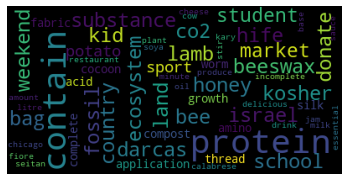

In [24]:
wordcloud_cluster_byIds(3, clusters, keywords)